In [1]:
#Load all required library
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics

### Import Iris.csv

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [5]:
iris.isnull().values.any()

False

In [6]:
iris.rename(columns={'Class':'Species'}, inplace=True)
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [7]:
from sklearn.model_selection import train_test_split

X =  iris.drop("Species", axis=1)
y =  iris[['Species']]

In [8]:
#Check the dataset
print(y)
print(X)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
5       Iris-setosa
6       Iris-setosa
7       Iris-setosa
8       Iris-setosa
9       Iris-setosa
10      Iris-setosa
11      Iris-setosa
12      Iris-setosa
13      Iris-setosa
14      Iris-setosa
15      Iris-setosa
16      Iris-setosa
17      Iris-setosa
18      Iris-setosa
19      Iris-setosa
20      Iris-setosa
21      Iris-setosa
22      Iris-setosa
23      Iris-setosa
24      Iris-setosa
25      Iris-setosa
26      Iris-setosa
27      Iris-setosa
28      Iris-setosa
29      Iris-setosa
..              ...
120  Iris-virginica
121  Iris-virginica
122  Iris-virginica
123  Iris-virginica
124  Iris-virginica
125  Iris-virginica
126  Iris-virginica
127  Iris-virginica
128  Iris-virginica
129  Iris-virginica
130  Iris-virginica
131  Iris-virginica
132  Iris-virginica
133  Iris-virginica
134  Iris-virginica
135  Iris-virginica
136  Iris-virginica
137  Iris-virginica


### Find the distribution of target variable (Class) (1 Marks)

### Plot the distribution of target variable using histogram

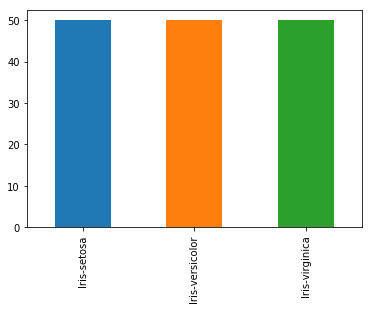

In [9]:
for col in iris.select_dtypes(include=[object]):
    iris[col].value_counts().plot(kind='bar')
    plt.show

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

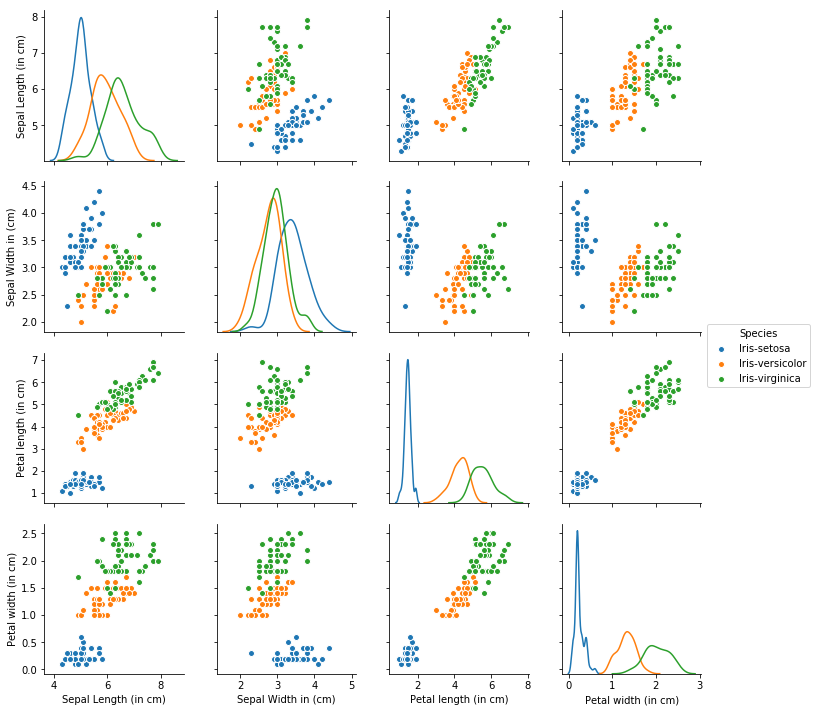

In [10]:
import seaborn as sns
sns.pairplot(iris,hue="Species",diag_kind='kde')

In [11]:
# As Petal width increases -> Sepal Length increases
# As Petal width increases -> Sepal Width decreases 
# As Petal width increases -> Petal Length increases

# As Petal Length increases -> Sepal Length increases 
# As Petal Length increases -> Sepal Width decreases
# As Petal Length increases -> Petal Width increases

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [12]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [13]:
# Sepal Width:
    # 1. Variation / Std Dev of Sepal Width variable is less compared to other variables
    # 2. The mean is very close to Median. The spread of tails almost equally distributed with the distribution tending towards close to normal
# Petal Length and Petal Width:
    # 1. The mean of the above two variables lesser than Median.
    # 2. More points on the left hand side, skewed towards negative.

In [14]:
#Drop Id variable from data 
# there is no variable called as id

### Correlation among all variables and give your insights (1 Marks)

In [15]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


In [16]:
# As Petal width increases -> Sepal Length increases (Correlation coefficient: 0.82 - Highly correlated)
# As Petal width increases -> Sepal Width decreases (Correlation coefficient: -0.37 - moderately correlated)
# As Petal width increases -> Petal Length increases (Correlation coefficient: 0.96 - Highly correlated)

# As Petal Length increases -> Sepal Length increases (Correlation coefficient: 0.87 - Highly correlated)
# As Petal Length increases -> Sepal Width decreases (Correlation coefficient: -0.43 - moderately correlated)
# As Petal Length increases -> Petal Width increases (Correlation coefficient: 0.96 - Highly correlated)


# As Sepal Width increases -> Sepal Length decreases (Correlation coefficient: -0.12 - Slightly correlated)
# However, for Naive Bayes analysis, we will not drop / ignore any variables / dimensions.

### Split data in Training and Validation in 80:20 (1 Marks)

In [17]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.preprocessing import LabelEncoder
cols = iris.select_dtypes(include=[object]).columns
le_class = LabelEncoder()
for i in cols:
    iris[i]= le_class.fit_transform(iris[i])

print(iris["Species"].value_counts())
y =  iris[['Species']]

2    50
1    50
0    50
Name: Species, dtype: int64


In [18]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.20, random_state=1)

### Do Feature Scaling ( 1 Marks)

In [19]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_set = scaler.fit_transform(train_set)
scaled_test_set = scaler.transform(test_set)

### Train and Fit NaiveBayes Model(2 Marks)

In [25]:
#Fit the model
model = GaussianNB()
model.fit(scaled_train_set, train_labels)

C:\Users\rames\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [26]:
# show Confusion Matrix
test_pred = model.predict(scaled_test_set)
print(metrics.confusion_matrix(test_labels, test_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [22]:
# show accuracy
model.score(scaled_train_set , train_labels)

0.95

In [23]:
model.score(scaled_test_set , test_labels)

0.9666666666666667

In [24]:
#Show precision and Recall metrics
print(metrics.classification_report(test_labels, test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        13
          2       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

